In [5]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf

import koopman as kp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


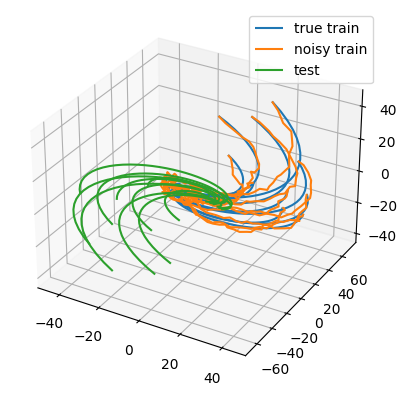

In [8]:
lds = kp.dynamics.LDS(A=[[-2, 0, 4], [4, 0, 4], [-4, -2, -4]])
true_train, noisy_train = lds.make_rand_trajs(0, 50, 5000, noise_var=1)
test = lds.make_rand_trajs(-50, 0, 1000, noise_var=0)
kp.utils.plot([true_train, noisy_train, test],
              target_dim=3,
              labels=["true train", "noisy train", "test"],
              max_lines=10)

In [9]:
net = kp.network.KoopmanNetwork(lds.dim)
net.train(noisy_train, autoencoder_epochs=10, autoencoder_batch_size=100, model_epochs=10, model_batch_size=100, log="training.csv")

Epoch 1/10
50/50 [==============================] - 1s 7ms/step - loss: 470.7637
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 361.0362
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 224.4617
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 125.0358
Epoch 5/10
50/50 [==============================] - 0s 9ms/step - loss: 84.0422
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 43.4972
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 26.9522
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 22.3807
Epoch 9/10
50/50 [==============================] - 1s 10ms/step - loss: 18.2792
Epoch 10/10
50/50 [==============================] - 0s 7ms/step - loss: 12.3023
Epoch 1/10
50/50 [==============================] - 32s 12ms/step - loss: 116539.7734 - reconstruction_loss: 196.4586 - state_prediction_loss: 67617.4062 - linear_dynamics_loss: 115860.5391 - in

In [ ]:
pred_train = net.predict(true_train[:, 0, :])
pred_test = net.predict(test[:, 0, :])
kp.utils.plot([true_train, pred_train], labels=["true train", "pred. train"])

In [ ]:
kp.utils.plot([test, pred_test], labels=["test", "pred. test"])